In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [2]:
class People(object):
    def __init__(self, ID, Infected, NumPeople, MinKnow, MaxKnow, InfectionRate):
        self.Infected = Infected
        self.X = ID % math.sqrt(NumPeople)
        self.Y = ID // math.sqrt(NumPeople)
        self.NumPeople = NumPeople
        self.MinKnow = MinKnow
        self.MaxKnow = MaxKnow
        self.Neighbors = []
        self.InfectionRate = InfectionRate
        i = random.randrange(self.MinKnow,self.MaxKnow+1)
        for k in range(i):
            know = random.randrange(0,self.NumPeople-1,1)
            self.Neighbors.append(know)   
            
    def InfectEveryone(self):
        if self.Infected == True:
            for check in range(len(self.Neighbors)):
                sickNow = random.random()
                if sickNow < InfectionRate:
                    Individuals[self.Neighbors[check]].Infected = True

In [3]:
def InitialInfected(InitialPeopleInfected, NumPeople):
    for i in range(InitialPeopleInfected):
        InfectedStart = random.randrange(0,NumPeople-1,1)
        Individuals[InfectedStart].Infected = True
        
def InfectedCount(NumPeople):
    count = 0
    for i in range(NumPeople):
        if Individuals[i].Infected == True:
            count = count + 1
    return count

def Day(NumPeople):
    for i in range(NumPeople):
        Individuals[i].InfectEveryone()
    InfectedPerDay.append(InfectedCount(NumPeople))
        


In [4]:
Persons = 900
MaxKnow = 10
MinKnow = 5
InitialPeopleInfected = 1
InfectionRate = .1
days = 10
Individuals = [None]*Persons
InfectedPerDay = []

for i in range(Persons):
    Individuals[i]=People(ID=i,Infected=False,NumPeople=Persons,MinKnow=MinKnow,MaxKnow=MaxKnow,InfectionRate=InfectionRate)

InitialInfected(InitialPeopleInfected=InitialPeopleInfected, NumPeople=Persons)


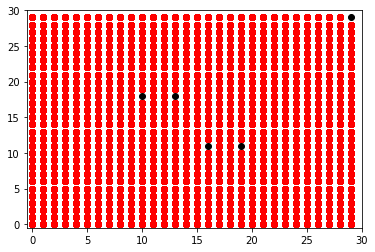

In [5]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')


x = []
y = []

fig, ax = plt.subplots()
for i in range(Persons):
    x.append(Individuals[i].X)
    y.append(Individuals[i].Y)
#    littleLineX = []
#    littleLineY = []
#    for j in range(len(Individuals[i].Neighbors)):
#        littleLineX.append(Individuals[i].X)
#        littleLineX.append(Individuals[Individuals[i].Neighbors[j]].X)
#        littleLineY.append(Individuals[i].Y)
#        littleLineY.append(Individuals[Individuals[i].Neighbors[j]].Y)
#        plt.plot(littleLineX,littleLineY, 'k')

l = plt.plot(x, y, 'ko')

ax = plt.axis([-.5,math.sqrt(Persons),-.5,math.sqrt(Persons)])



def animate(i):
    Day(Persons)
    for i in range(Persons):
        if Individuals[i].Infected == True:
            RedDot = plt.plot(Individuals[i].X, Individuals[i].Y, 'ro')
#            edge = []
#            for j in range(len(Individuals[i].Neighbors)):
#                littleLineX.append(Individuals[i].X)
#                littleLineX.append(Individuals[Individuals[i].Neighbors[j]].X)
#                littleLineY.append(Individuals[i].Y)
#                littleLineY.append(Individuals[Individuals[i].Neighbors[j]].Y)
#                edge.append(plt.plot(littleLineX,littleLineY, 'r'))
    return RedDot


# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frames=25, \
                                      interval=1000, blit=True, repeat=False)

HTML(myAnimation.to_html5_video())

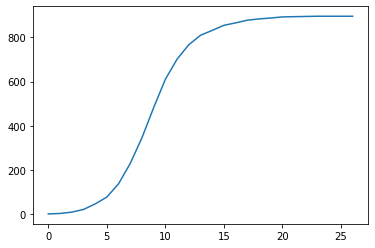

In [6]:
plt.plot(InfectedPerDay)